# COGS 108 - Data Checkpoint

## Authors - Group 54, COGS 108

- **Nathaniel Abuan:** Project administration, Background research, Analysis, Software, Visualization, Data curation
- **Isabel Phamvan:** Conceptualization, Background research, Methodology, Experimental investigation, Visualization 
- **Kayle Kong:** Analysis, Background research, writing
- **Frances Scott:** Background research, writing, analysis
- **Di Effio Vizcarra:** Visualization, Software

## Research Question

How do student stress levels change as a function of time relative to academic milestones during an academic term, and does this relationship differ between quarter-system and semester-system universities?

**UPDATE 2/18/2026: After reviewing our project proposal feedback, we had rewrote our research question and redefined our independent / dependent variables based on the following sub-ideas:**
- What exactly is our independent and dependent variables? How can we make our research question less vague?
- What does the sentence 'vary through the term' mean mathematically? 
- How can we actually measure and quanitify the relationship between stress, courseload, and the academic calendar year through data?

## Background and Prior Work

University students frequently experience elevated stress due to academic demands, which can negatively impact mental health, sleep quality, and academic performance (Lu et al., 2018; Misra & McKean, 2000; Sharma et al., 2019). While much research has established that students experience chronic stress, recent work emphasizes that stress is dynamic, fluctuating in response to temporal pressures within an academic term (Misra & McKean, 2000). Understanding these fluctuations is critical, as periods of high stress—such as midterms and finals—can coincide with declines in well-being and academic functioning (Lu et al., 2018).

Longitudinal studies indicate that student stress levels rise during peak academic periods rather than remaining stable across a term. For example, a study tracking incoming college students found higher average stress during examination periods, which was associated with poorer sleep quality and increased negative affect (Lu et al., 2018). These findings suggest that high-frequency or near real-time measurements are particularly valuable for capturing transient spikes and recoveries in stress, aligning data collection with specific academic events (Sharma et al., 2019). Such designs provide a framework for modeling stress as a time-varying outcome rather than a single static measure.

Recent research also highlights that not only the volume of academic work, but the pacing and structure of the curriculum, influence stress trajectories (Sharma et al., 2019). Compressed workloads can create more frequent stress peaks with limited recovery time, whereas extended timelines may allow stress to rise more gradually. This insight motivates examining how different academic calendar structures, such as semester and quarter systems, shape stress patterns over time.

Quarter systems, characterized by accelerated content coverage and more frequent course transitions, may produce earlier and more intense stress peaks relative to semester systems, which provide longer adjustment periods and extended timelines for assignments and exams (Sharma et al., 2019). Although both systems contain predictable stress points, such as midterms and finals, the compressed nature of the quarter system suggests potential differences in when and how stress accumulates during an academic term. Examining these differences can inform institutional policies and interventions aimed at mitigating stress across varying academic structures.

> Lu, Z., et al. (2018). The impact of stress on students in secondary school and higher education. https://pmc.ncbi.nlm.nih.gov/articles/PMC6122850/

> Misra, R., & McKean, M. (2000). College students' academic stress and its relation to their anxiety, time management, and leisure satisfaction. https://pmc.ncbi.nlm.nih.gov/articles/PMC10779927/

> Sharma, M., et al. (2019). The impact of stress on students in secondary school and higher education. https://www.researchgate.net/publication/332361894_The_impact_of_stress_on_students_in_secondary_school_and_higher_education


**UPDATE 2/18/2026: Updated with prior and recent research + inline citations, rewrote background info and methodologies / design choices to better fit our revised research question and hypothesis.**

## Hypothesis


Our group hypothesizes that student stress levels will increase as academic workload intensifies across both the quarter and semester system terms, with significant peaks during coursework intensive periods such as midterms and finals. Students in quarter system universities such as the UCs will exhibit steeper increases of stress over time compared to semester systems, reflecting the compressed pacing of the academic calendar. We also assume that peak stress levels will occur earlier in the term in quarter systems than in semester systems, and students will experience greater week to week variability and volatility in stress compared to semester system students. The timing and intensity of coursework-intensive weeks such as midterms and finals are expected to mediate the relationship between academic system structure and student stress trajectories, with more frequent coursework and assessments in quarter systems contributing to earlier and steeper peaks in stress.

**UPDATE 2/18/2026: Rewrote entire hypothesis to better fit our research question and background work, as well as feedback from TA. 'Earlier' is defined better in terms of standardized progression throughout the term rather than absolute calendar days. Clarified how and why we expect midterms and finals to mediate the relationship between stress levels and BOTH quarter and semester systems. Avoided using vague terms like 'earlier' or 'partially' without proper justification, and made hypotheses directly testable and linked to measurable outcomes (stress distribution over time, mood over time, activity, variability, etc).**

## Data

### Data overview

- **Dataset #1**
  - **Dataset Name:** StudentLife (Dartmouth StudentLife GPS & Multi‑Sensor Data)
  - **Link to the dataset:** https://www.kaggle.com/datasets/dartweichen/student-life
  - **Number of observations:** 48 Undergraduate Students (Spring 2013, 10 week term) + Individual sensor samples (GPS data logged every 10 minutes, plus other sensor data spanning 10 weeks)
  - **Number of variables:** Hundreds of variables across multiple domains such as passive sensor streams (GPS, Bluetooth, Phone Activity), EMA Self Reports (Stress, Mood, Sleep, Activity), Pre/Post Psychological surveys (PHQ-9, percieved stress scale), and Educational Data (Class Schedules, Deadlines, Grades, Piazza Usage)
  - **Description of the variables most relevant to this project:** For this project, we are mainly looking at EMA and Educational Data - EMA: repeated momentary self‑reports of stress over time, enabling modeling of stress fluctuations aligned with academic events + Educational: Counts and timing of academic deadlines (including homework, quizzes, midterms, finals), crucial for modeling stress relative to milestones. Also, although it isnt really necessary, it is also worth noting that other sensor data may be relevant to this project: activity, sleep proxies, and phone usage allows potential covariates or moderators of stress (e.g., less sleep, higher sedentary activity linked with higher stress). 
  - **Descriptions of any shortcomings this dataset has with respect to the project:** A major shortcoming that might significantly impact our project with this dataset is an incredibly small sample size! Only 48 participants which limits generalizability to broader student populations and also reduces statistical power for data analysis and visualization. In addition, the dataset only covers one 10 week term at Dartmouth, similar to a UC quarter, so it does not include a contrasting semester system within the same dataset. This means that we cannot compare quarter vs semester systems directly.

In [33]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress:  50%|█████     | 1/2 [00:00<00:00,  8.56it/s]   

Successfully downloaded: airline-safety.csv



Overall Download Progress: 100%|██████████| 2/2 [00:00<00:00, 11.18it/s]

Successfully downloaded: bad-drivers.csv


### StudentLife - Behavioral data from mobile phones.

   1. This study is significant to our project because it highlights passive and automatic sensing data from the smartphones of 48 Dartmouth students over a 10 week term to assess student mental health such as depression, lonliness, and stress alongside academic performance (grades, term GPA, and cumulative GPA) and week to week behavior such as how stress, sleep, and activity change in response to college workload - ie. assignments, midterms, and finals as the term continues to progress.
   2. A couple of the issues that we had found with dataset was with the files themselves, as they were a bit hard to interpret and clean up; some of the data appears incomplete with full values and columns at 0 or 'null' at first. This dataset is also an incredibly small sample size! Only 48 participants which limits generalizability to broader student populations and also reduces statistical power for data analysis and visualization. In addition, the dataset only covers one 10 week term at Dartmouth, similar to a UC quarter, so it does not include a contrasting semester system within the same dataset. This means that we cannot compare quarter vs semester systems directly without another dataset. We need to plot some of these visualizations better, however it is hard to generate 'stress over term' visualizations because the 'week' column after tidying and cleaning up the original json files show up as null or 0, but we were able to generate a simple box distribution using the 49 responses provided.

In [2]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
# code to load stress data
DATA_PATH = "/home/nabuan/Group054_WI26/data/studentlife"

import os
os.getcwd()
os.listdir(DATA_PATH)

import pandas as pd
import json
import glob
import os

stress_path = f"{DATA_PATH}/EMA/Stress/*.json"
files = glob.glob(stress_path)

dfs = []

for file in files:
    with open(file) as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    # add participant ID
    uid = os.path.basename(file).replace(".json","")
    df["uid"] = uid

    dfs.append(df)

stress_df = pd.concat(dfs, ignore_index=True)

stress_df.head()


,null,resp_time,level,location,uid
0,"43.70477575,-72.28844073",1364121982,NaN,NaN,Stress_u44
1,2,1364121983,NaN,NaN,Stress_u44
2,"43.70637091,-72.28704334",1364118696,NaN,NaN,Stress_u44
3,4,1364121980,NaN,NaN,Stress_u44
4,3,1364121985,NaN,NaN,Stress_u44


In [3]:
#identifying column names
stress_df.columns

Index(['null', 'resp_time', 'level', 'location', 'uid'], dtype='object')

In [4]:
# conversion from unix timestamps, cleaning and tidying up data
stress_df = stress_df.rename(
    columns={"resp_time": "timestamp"}
)

stress_df["timestamp"] = pd.to_datetime(
    stress_df["timestamp"],
    unit="s",
    errors="coerce"
)

stress_df["stress_level"] = pd.to_numeric(
    stress_df["null"],
    errors="coerce"
)

clean_stress = stress_df.dropna(
    subset=["stress_level", "timestamp"]
)

clean_stress = clean_stress[
    ["uid", "timestamp", "stress_level"]
]

clean_stress.head()

,uid,timestamp,stress_level
1,Stress_u44,2013-03-24 10:46:23,2.0
3,Stress_u44,2013-03-24 10:46:20,4.0
4,Stress_u44,2013-03-24 10:46:25,3.0
93,Stress_u17,2013-03-24 10:38:44,3.0
95,Stress_u17,2013-03-24 10:38:47,3.0


In [5]:
# mean, min, max distribution 

start = clean_stress["timestamp"].min()

clean_stress["week"] = (
    (clean_stress["timestamp"] - start)
    .dt.days // 7
)

weekly_stress = (
    clean_stress
    .groupby(["uid","week"])["stress_level"]
    .mean()
    .reset_index()
)

clean_stress["stress_level"].describe()

count    122.000000
mean       2.336066
std        1.103044
min        1.000000
25%        1.000000
50%        2.500000
75%        3.000000
max        5.000000
Name: stress_level, dtype: float64

In [6]:
weekly_stress.head()

,uid,week,stress_level
0,Stress_u00,0,1.00
1,Stress_u01,0,2.75
2,Stress_u02,0,3.00
3,Stress_u03,0,2.00
4,Stress_u04,0,3.50


In [7]:
clean_stress["timestamp"].min(), clean_stress["timestamp"].max()

(Timestamp('2013-03-24 09:46:43'), Timestamp('2013-03-25 02:16:49'))

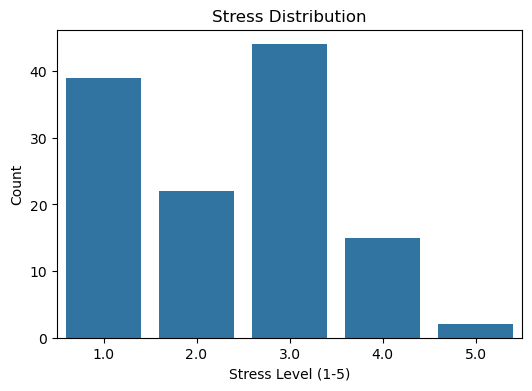

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="stress_level", data=clean_stress)
plt.title("Stress Distribution")
plt.xlabel("Stress Level (1-5)")
plt.ylabel("Count")
plt.show()

In [9]:
# do you have any suggestions on how to plot this better?
# It is hard to generate 'stress over term' visualizations because the 'week' after tidying and cleaning up the original json files show up as 0, but i was able to generate a simple box distribution over the 49 responses provided. is there any way to fix this?

In [10]:
# repeat for mood over term

DATA_PATH = "/home/nabuan/Group054_WI26/data/studentlife"

mood_path = f"{DATA_PATH}/EMA/Mood/*.json"
files = glob.glob(mood_path)  # use mood_path here

dfs = []

for file in files:
    with open(file) as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    uid = os.path.basename(file).replace(".json","")
    df["uid"] = uid

    dfs.append(df)

Mood_df = pd.concat(dfs, ignore_index=True)

Mood_df.head()

,happy,happyornot,location,resp_time,sad,sadornot,uid
0,3,1,"43.70717786666667,-72.2892299",1.366873e+09,1,1,Mood_u52
1,1,2,Unknown,1.368857e+09,4,1,Mood_u52
2,2,1,"43.70661212,-72.28703723",1.366870e+09,2,1,Mood_u19
3,2,1,"43.70268617,-72.28974899",1.366956e+09,1,2,Mood_u19
4,1,1,"43.70670747,-72.28550624",1.367201e+09,3,1,Mood_u19


In [11]:
Mood_df.describe()

,resp_time
count,2.770000e+02
mean,1.368556e+09
std,1.191026e+06
min,1.366845e+09
25%,1.367720e+09
50%,1.368684e+09
75%,1.369210e+09
max,1.376106e+09


In [12]:
# tidying data for mood over term visualization: 

import numpy as np

Mood_df = Mood_df[["uid", "resp_time", "happy", "sad"]].copy()


Mood_df["happy"] = pd.to_numeric(Mood_df["happy"], errors="coerce")
Mood_df["sad"] = pd.to_numeric(Mood_df["sad"], errors="coerce")
Mood_df["resp_time"] = pd.to_numeric(Mood_df["resp_time"], errors="coerce")


Mood_df = Mood_df.dropna(subset=["resp_time", "happy", "sad"])


Mood_df["timestamp"] = pd.to_datetime(Mood_df["resp_time"], unit="s")


Mood_df["week"] = Mood_df.groupby("uid")["timestamp"].transform(
    lambda x: ((x - x.min()).dt.days // 7).astype(int)
)

Mood_df["value"] = Mood_df["happy"]

tidy_mood = Mood_df[["uid", "week", "timestamp", "value"]]

tidy_mood.head()

,uid,week,timestamp,value
0,Mood_u52,0,2013-04-25 06:56:55,3.0
1,Mood_u52,3,2013-05-18 05:59:59,1.0
2,Mood_u19,0,2013-04-25 06:02:33,2.0
3,Mood_u19,0,2013-04-26 05:55:18,2.0
4,Mood_u19,0,2013-04-29 02:01:05,1.0


In [13]:
# analysis of week to week mood
weekly_mood = (
    tidy_mood
    .groupby(["uid", "week"])["value"]
    .mean()
    .reset_index()
    .sort_values(["uid", "week"])
)

weekly_mood.head

<bound method NDFrame.head of          uid  week     value
0   Mood_u00     0  1.500000
1   Mood_u00     2  3.000000
2   Mood_u00     3  1.400000
3   Mood_u00    14  1.000000
4   Mood_u00    15  1.000000
..       ...   ...       ...
94  Mood_u59     2  1.444444
95  Mood_u59     3  2.000000
96  Mood_u59     4  1.933333
97  Mood_u59     5  2.900000
98  Mood_u59     6  2.000000

[99 rows x 3 columns]>

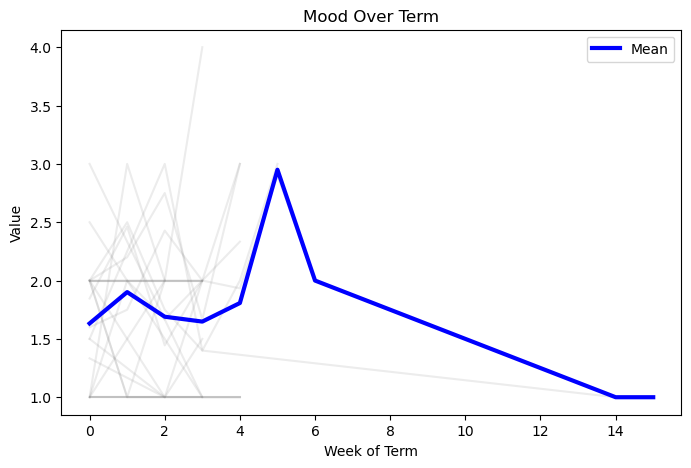

In [14]:
# mood over term visualization 
def plot_weekly(weekly_df, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(8,5))
    
    for uid, group in weekly_df.groupby("uid"):
        plt.plot(group["week"], group["value"], alpha=0.15, color="gray")
    
    weekly_avg = weekly_df.groupby("week")["value"].mean().reset_index()
    plt.plot(weekly_avg["week"], weekly_avg["value"], color="blue", linewidth=3, label="Mean")
    
    plt.xlabel("Week of Term")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.show()

plot_weekly(weekly_mood, "Mood Over Term")

In [15]:
# I am trying to figure out how to take this dataset a step further by including the rest of the EMA, educational data and survey responses into our analysis, as well as fixing the 'stress' part of our dataset. Those are our next steps to the project, will visit office hours to work through it with TA. We also need to figure how to plot these graphs better, so I am open to any suggestions in the feedback if you have any!

## Ethics

### A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [X] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?

> We recognize that datasets on student stress may be subject to collection bias or self-selection bias. The self-selection bias could be that students experiencing higher or lower stress may be more likely to respond and self-report bias. Steps to mitigate bias is to acknowledge the limitations and interpret results carefully, we will avoid strong causal claims and overgeneralization to all students in datasets. 

 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [X] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

> We have considered that there may be biased outcomes with different student groups and stress patterns. In our data, we will make sure to do research using student demographics data to see if there are any biased or skewed results. If this is not possible, we will acknowledge any limitations and not make any generalized claims based on this data.

### B. Data Storage
 - [X] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?

> We are protecting and securing all datasets by storing them on personal password protected devices and our private repository. Team members involved in this project and those on the course teaching team have access to our current work. Our in progress analysis, visualization, and data are only accessible by the project group. We will also maintain up to data software, restrict public access to our data, and use version control to track all changes. 

 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

### C. Analysis
 - [X] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?

> We know that our analysis may not encompass all students and the full range of things that may affect stress. There may be blind spots in our analysis due to this and we will be sure to compare multiple datasets from the two academic systems and different institutions. We will make sure to note missing populations such as the institutions not included as well as students that did not participate in survey or study datasets. In our research we will also check our assumptions and any implications with other research, to be sure that our conclusions are consistent. Being aware of any confounding variables that may affect our results leading to assumptions of results.

 - [X] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?

> The possible source of biases could be that students who are filling out the survey or are having their data collected may be less stressed or be a specific population in the school. We will be sure to address/mitigate this bias by collecting data that is random or make sure we are aware of this while explaining our results. There may also be less data available for one academic system and another, with a quarter and semester system. These limitations will be discussed when interpreting any observed differences between quarter and semester systems.

 - [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

> The visualizations, summary statistics, and reports will accurately represent the data. It will be readable, clear, and accurate. Our research visualization will label axes, key if necessary, and be scaled properly.  

 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

> We will make sure that our analysis is fully documented and reproducible by being organized with our GitHub repository. The datasets, data cleaning code, analysis code, and visualization code will all be incorporated into our project. We will have a step by step of all the work that we have done so that a future researcher could replicate our study. 

### D. Modeling
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [X] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?

> We will assess fairness by making sure that our findings are consistent across different datasets with our analysis. This will be done by making sure that our results are driven by multiple datasets and across institutions. 

 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [X] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?

> We will make sure to be clear and concise with our process when modeling to validate our research decisions if a justification is needed. We will use simple statistical methods and modeling that have clear conclusions and procedures. This will allow us to be transparent and understandable with how we reached conclusions, with documentation of any decisions, assumptions, inputs, and outputs.

 - [X] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

> We will communicate that any findings may have confounds and could not be causation. There are limitations of our data as it could be limited to few universities, with our limited datasets that are relevant. This may also be biases of the model, with possible evaluation biases due to few datasets that represent what we are researching.

### E. Deployment
 - [X] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?

> The project does not have plans to be deployed in a real-world setting, however, in the case this does happen we will be sure to continue to keep it in a version-controlled GitHub repository. This will allow us to be able to view any changes such as push and pulls that are being made. We would also audit summary statistics, visualizations, and regression outputs to confirm that findings are consistent across datasets and not driven by incorrect data or outliers. If new or updated datasets are incorporated, we will rerun our analyses to check concept drift and take note of any differences.

 - [X] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?

> The project studies student stress levels, quarter system, and semester system universities. Student stress levels may be a sensitive topic, so with our research we will do our best not to misrepresent and do harm with our data. Our plan for response if users are harmed by results, is that our data science team will evaluate the cause by checking our data, visualizations, and interpretations to make sure they are valid, unbiased, and clear. We will discover any limitations of our research, and update any issues to prevent future harm.

 - [ ] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [X] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

> We have taken steps to realize that there could be unintended consequences such as ranking of quarter vs semester intuitions, a lower perspective of certain universities, and assumptions about students’ stress. We will make sure that our conclusions are made without bias and are neutral. We will monitor any future updates or use of this work, to make sure it is aligned with our original conclusions and are supported fully by data.


## Team Expectations 

> **To check in with one another on a weekly / biweekly basis for project work, details ideas, questions, and concerns, communicate through text, meet on zoom, respond within 24 hours (If part is not finished the night it is due, communicate often).**

> **To delegate tasks and responsibilities to members equally.** 

> **To contribute equally to the project across all components: data wrangling, code, visualization, project drafting and final submission.**

> **To communicate effectively (and respectfully) via text message or email in case of any sudden changes toward our project or code.**

> **To work together and improve upon our Python / GitHub skills as a collective group.**



## Project Timeline Proposal

**Tentative, subject to change within the next few weeks depending on availability and project needs.**

**UPDATE 02/18/2026: Everything is on track, however we needed to spend a lot of the last week changing some of the parts to our actual project based on the proposal feedback from last week. We started to tidy up a couple of the Stress, Mood, Behavior and Activity datasets from Dartmouth StudentLife but need to figure out the best way to visualize the data together and aggregate all the separate data into a complete set.**

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/28  |  8 PM | Initial group introduction  | Project review and brainstorm ideas for research questions
 | 
| 2/3  | 4 PM |  Clone github repo, begin writing for project proposal |Discuss next steps for project, delegate tasks and responsibilites, and assign data checkpoint roles | 
| 2/11  | TBD | Start data wrangling and writing code for tables / data visualization. Also, edit research question / backgkground, hypothesis and dataset analysis based on proposal feedback. | Discuss and prepare for data checkpoint, assign roles for data + EDA checkpoints |
| 2/18  | TBD | Continue data wrangling and code for data visualization, begin analysis of data and prepare submission for data checkpoint.| Data checkpoint: discuss data wrangling, begin analysis of patterns / correlations between student stress levels over time and academic system structure   |
| 2/25  | TBD  | Start writing first draft of final project  | Discuss/edit analysis; complete project check-in, discuss first draft details |
| 3/4  | TBD  | Prepare for EDA Checkpoint | Discuss EDA checkpoint and project check-in|
| 3/11  | TBD  | Complete analysis; draft final results/conclusion/discussion, prepare Github repository for final submission| Discuss final project checkpoint and final Github submission, prepare for project turn in |
| 3/18  | BEFORE 11:59 PM  | Turn in final project & group project surveys | N/A |